<a href="https://colab.research.google.com/github/Mariajulialetro/template_portfolio/blob/master/An%C3%A1lise_dos_Dados_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise dos Dados do Airbnb - Rio de Janeiro**


O Airbnb é uma plataforma online que permite às pessoas alugarem ou disponibilizarem acomodações em todo o mundo. Fundado em 2008, o Airbnb conecta viajantes a anfitriões que oferecem uma variedade de opções de hospedagem, desde quartos individuais até casas inteiras. Os usuários podem reservar acomodações, pagar online e deixar avaliações após a estadia. O Airbnb transformou a maneira como as pessoas viajam e encontram alojamento, oferecendo uma alternativa única aos hotéis tradicionais.


**Neste Notbook iremos analisar os dados referentes a cidade do Rio de Janeiro e identificar quais os insights podem ser extraídos.**

### Obtenção dos Dados
Todos os dados foram extraídos através do site: https://insideairbnb.com/

Para esta análise exploratória, será baixado o arquivo:

*   *listings.csv - Summary information and metrics for listings in Rio de Janeiro.*




In [2]:
#importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sps

%matplotlib inline

In [3]:
#importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv")

## Análise dos Dados
Esta Etapa tem por objetivo criar uma consciencia situacional e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**


*   id - Número de id gerado para identificar o imóvel
*   name - Nome da propriedade anunciada
*   host_id - Número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   price - Preço para alugar o imóvel
*   neighbourhood - Nome do Bairro
*   roon_type - Informa o tipo de quarto que é oferecido
*   reviews_per_month - Quantidade de reviews por mês
*   calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião
*   availability_365 - Número de dias de disponibilidade dentro de 365 dias

*Antes de iniciar a análise, vamos verificar as 5 primeiras entradas do dataset*









In [4]:
#mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,359,2021-04-21,2.79,1,139
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.98102,-43.19172,Entire home/apt,493,3,18,2016-02-09,0.18,2,365


## **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [5]:
# Identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\ t{}n".format(df.shape[1]))




Entradas:	 26467
Variáveis:\ t16n


## **Q2. Qual a porcentagem de valores ausentes no dataset?**

In [ ]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
last_review                       0.371179
reviews_per_month                 0.371179
host_name                         0.032380
name                              0.001096
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

## **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis: Plotar estograma.


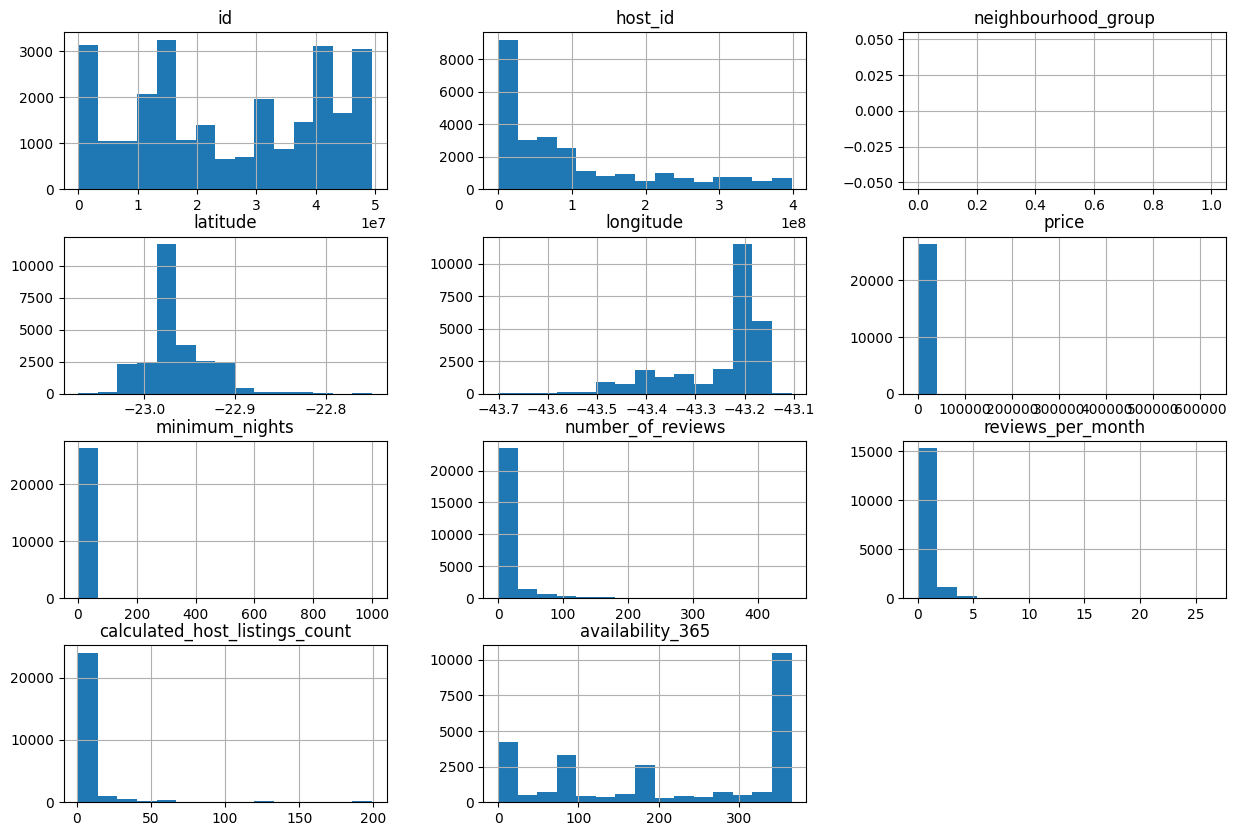

In [6]:
# plotar o estograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

## **Q4. Há outliers presentes?**

Percebe-se a presença de outliers em algumas variáveis, como "price", "minimum_nights" e cauculated_host_listings_count.

Os valores não seguem uma distribuição, ocasionando a distorção da apresentação gráfica.
Detectar outliers:


*   Resumo estatístico pelo metodo describe( )
*   Plotar boxplots para a variável



In [7]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26467.000000,26467.00000,26467.000000,16643.000000,26467.000000,26467.000000
mean,734.860052,4.80096,12.417501,0.580291,6.919220,214.943099
std,5274.600381,19.21445,30.313117,0.823784,21.310525,143.136520
min,0.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.00000,0.000000,0.080000,1.000000,88.000000
50%,260.000000,2.00000,2.000000,0.260000,1.000000,223.000000
75%,529.000000,4.00000,9.000000,0.770000,3.000000,364.000000
max,623592.000000,1000.00000,452.000000,26.430000,199.000000,365.000000


Observando os números (resumo) estatístico acima, pode-se confirmar algumas hipóteses como:

*     A varíável price possui 75% do valor abaixo de 529, porém seu valor máximo é 623592.
*     A quantidade de mínima de noites (minimum_nights) está acima de 365 dias no ano.

# Boxplot para minimum_nights


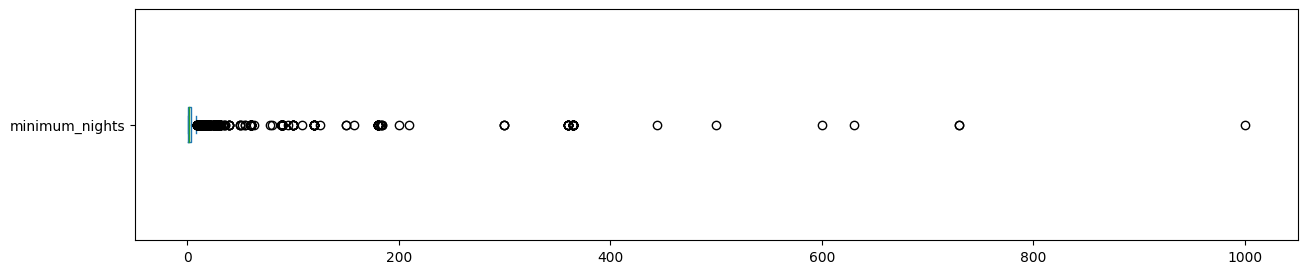

minimum_nights: valores acima de 30:
216 entradas
0.8161%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas". format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))



## Boxplot para price

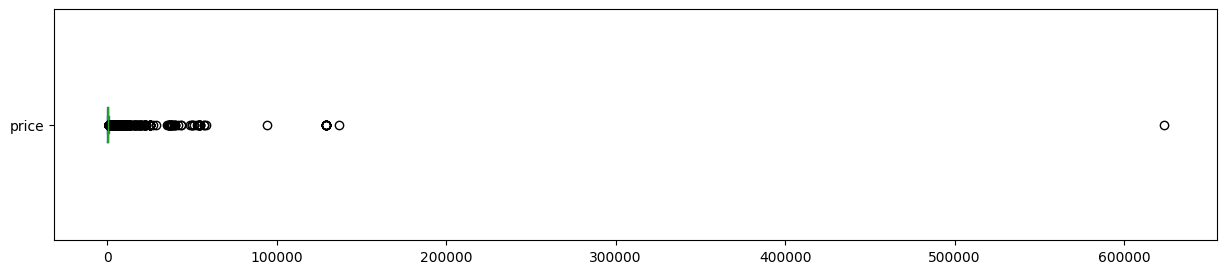


price: valores acima de 6000
264 entradas
0.9975%


In [9]:
#price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 6000 para price
print("\nprice: valores acima de 6000")
print("{} entradas". format(len(df[df.price > 6000])))
print("{:.4f}%".format((len(df[df.price > 6000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False), xlim=(0,1300), figsize=(15,3));

## Histograma sem Outliers

Após identificado outliers nas variáveis "price" e "minimum_nights", será limpado o DataFrame delas e em seguida plotar novamente o histograma.


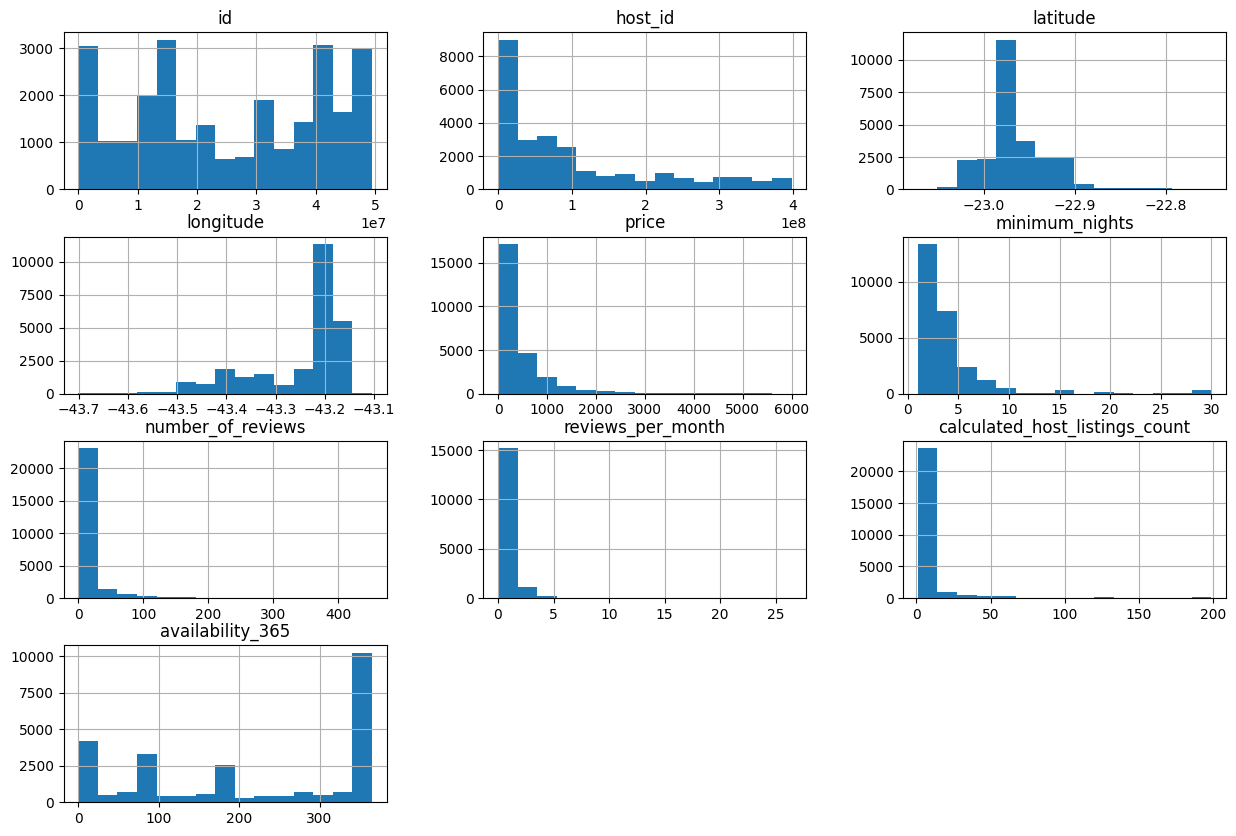

In [10]:
# Remover os *outliers* em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 6000]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30]. index, axis=0, inplace=True)


# Remover "neigbourhood_group", pois está vazio

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas

df_clean.hist(bins=15, figsize=(15,10));


##Q5. Qual a correlação existente entre as variáveis?



*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn






In [11]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.123811,-0.142235,-0.145147,0.052928,0.083579
minimum_nights,0.123811,1.000000,-0.065049,-0.098481,-0.044933,-0.011138
number_of_reviews,-0.142235,-0.065049,1.000000,0.642785,-0.047928,-0.069996
reviews_per_month,-0.145147,-0.098481,0.642785,1.000000,-0.018997,-0.132723
calculated_host_listings_count,0.052928,-0.044933,-0.047928,-0.018997,1.000000,0.024776
availability_365,0.083579,-0.011138,-0.069996,-0.132723,0.024776,1.000000


## Q6. Qual o tipo de imóvel mais alugado no Airbnb?

A coluna "room_type" indica o tipo de locação que está anunciada no Airbnb.
A próxima etapa é identificar o número de ocorrencias de cada tipo de aluguel, usando o método value_counts().


In [12]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


room_type
Entire home/apt    18755
Private room        6549
Shared room          602
Hotel room            90
Name: count, dtype: int64

In [13]:
# monstrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]



room_type
Entire home/apt    0.721457
Private room       0.251923
Shared room        0.023157
Hotel room         0.003462
Name: count, dtype: float64

## **Q7. Qual a localidade mais cara do Rio?**



In [14]:
df_clean.groupby(['neighbourhood']).price.mean(). sort_values(ascending=False)[:10]


neighbourhood
Anchieta             2848.500000
Joá                  2104.840000
Vila Militar         1408.666667
Caju                 1325.000000
Alto da Boa Vista    1176.763158
São Conrado          1039.705000
Cavalcanti            925.000000
Guaratiba             908.256098
Realengo              888.714286
Lagoa                 852.581749
Name: price, dtype: float64

Mostra-se os bairros como Anchieta, Vila Militar e Caju, estão com média de preço superior aos demais. Uma amostra pode não ser representativa. O que acontece é que podem ter poucos imoveis/locações em um determinado bairro.Exemplo:



In [15]:
# ver quantidade de imóveis no Vila Militar

print(df_clean[df_clean.neighbourhood =="Vila Militar"].shape)


(3, 15)


Como são fornecidas as Latitudes e Longitudes para os imóveis? É possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.


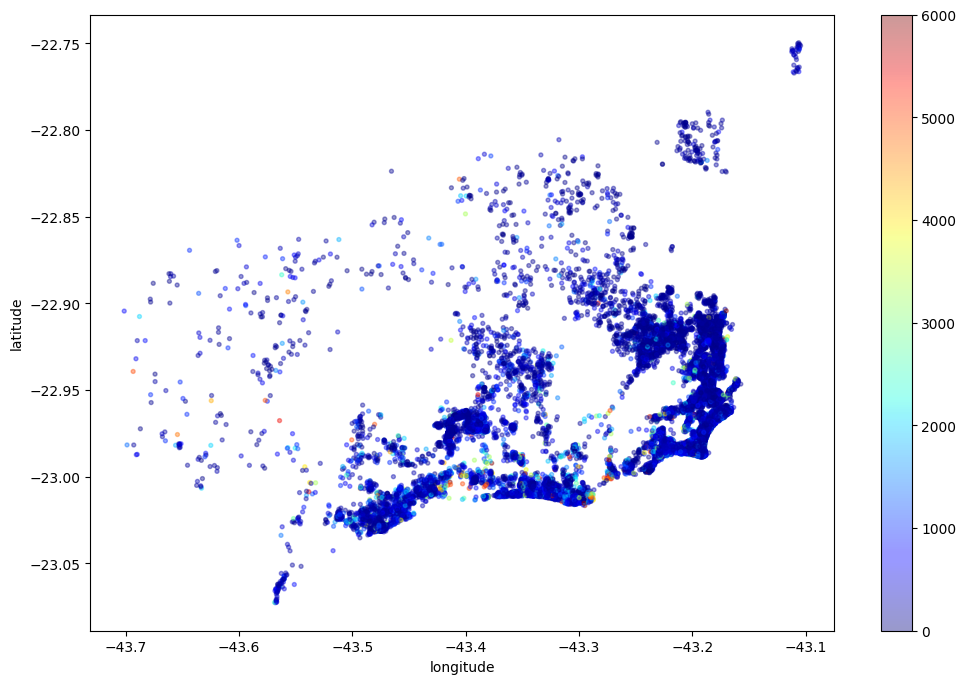

In [20]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
                    cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**

Feita uma análise superficial na base de dados do Airbnb, e, percebe-se a presença de muitos outliers nas variáveis.
Nota-se também que há poucos imóveis em algumas localidades, o que pode distorcer as informações estatísticas de alguns atributos.
Este é um dataset resumido realizado para aprendizado.
